Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


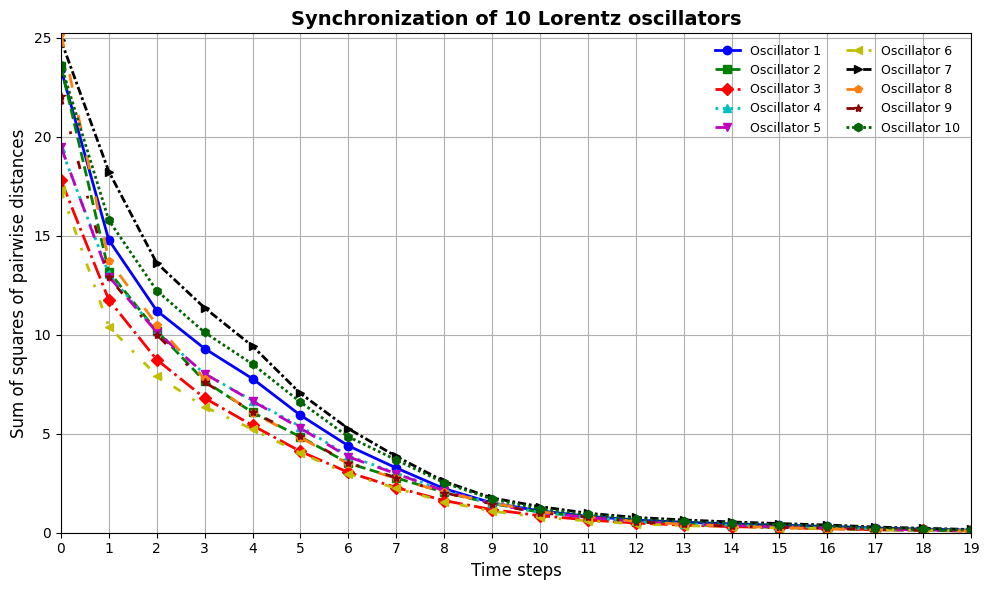

Files saved:
/content/drive/My Drive/Synchronization_image.pdf
/content/drive/My Drive/Synchronization_image.eps


In [46]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== File path to sync_data.xlsx =====
file_path = '/content/drive/My Drive/sync_data.xlsx'  # Change if needed

# ===== Load data =====
df = pd.read_excel(file_path, sheet_name=0)

# Load E from B1:K20 (transpose so each row is one series from B..K)
E = df.iloc[0:20, 1:11].to_numpy().T

# ===== Determine axis limits =====
x_min, x_max = 0,19
y_min, y_max = 0,np.max(E)

# ===== Plot =====
fig, ax = plt.subplots(figsize=(10, 6))

# Style combinations
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF7F0E', '#8B0000', '#006400']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']
linestyles = ['-', '--', '-.', ':', (0, (5, 5)), (0, (3, 5, 1, 5)),
              (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (1, 1))]

# Plot each row
for i in range(E.shape[0]):
    ax.plot(
        range(0, E.shape[1]),  # x-values from 1 to 20
        E[i],
        label=f'Oscillator {i+1}',
        color=colors[i % len(colors)],
        marker=markers[i % len(markers)],
        linestyle=linestyles[i % len(linestyles)],
        linewidth=2,
        markersize=6
    )

# ===== Labels and formatting =====
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(range(0,20,1), labels=[str(i) for i in range(0,20,1)])  # integer ticks from 0 to 20
ax.set_xlabel("Time steps", fontsize=12)
ax.set_ylabel("Sum of squares of pairwise distances", fontsize=12)
ax.set_title("Synchronization of 10 Lorentz oscillators", fontsize=14, fontweight='bold')

ax.legend(fontsize=9, loc='upper right', frameon=False, ncol=2)
ax.grid(True)

plt.tight_layout()

# ===== Save outputs =====
save_dir = os.path.dirname(file_path)
pdf_path = os.path.join(save_dir, "Synchronization_image.pdf")
eps_path = os.path.join(save_dir, "Synchronization_image.eps")

plt.savefig(pdf_path, format='pdf', bbox_inches='tight')
plt.savefig(eps_path, format='eps', bbox_inches='tight')

plt.show()

print(f"Files saved:\n{pdf_path}\n{eps_path}")
